In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

In [3]:
import os
print(os.getcwd())
print(os.listdir())


/home/01e8c0d6-55b3-4404-abea-629433cfc2c8/Elevvo
['gender.csv', 'train.csv', 'test.csv', 'TASK2.ipynb', 'Elevvo Task 2.ipynb', '.ipynb_checkpoints']


In [5]:
df = pd.read_csv("train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
sns.set(style="whitegrid")

pd.set_option('display.max_columns', None)


In [7]:
print(os.getcwd())
print(os.listdir())   


/home/01e8c0d6-55b3-4404-abea-629433cfc2c8/Elevvo
['gender.csv', 'train.csv', 'test.csv', 'TASK2.ipynb', 'Elevvo Task 2.ipynb', '.ipynb_checkpoints']


In [8]:
df = pd.read_csv('train.csv')   
df.head()                   
df.shape                   
df.info()                       
df.describe(include='all').T    


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,1601,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [9]:

missing_counts = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().mean() * 100).sort_values(ascending=False)
pd.concat([missing_counts, missing_percent], axis=1, keys=['missing', 'percent'])


,missing,percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Name,0,0.000000
Pclass,0,0.000000
Survived,0,0.000000
Sex,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000


In [10]:

df['Pclass'] = df['Pclass'].astype('category')
df['Survived'] = df['Survived'].astype('category')


print(df['Sex'].value_counts())
print(df['Pclass'].value_counts())
print(df['Embarked'].value_counts(dropna=False))


Sex
male      577
female    314
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64


In [12]:

df['Survived'] = pd.to_numeric(df['Survived'], errors='coerce')


overall_survival_rate = df['Survived'].mean()
print(f"Overall survival rate: {overall_survival_rate:.2%}")

print(df.groupby('Sex')['Survived'].mean())


print(df.groupby('Pclass')['Survived'].mean())


Overall survival rate: 38.38%
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


/tmp/ipykernel_1039/21966423.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Pclass')['Survived'].mean())


In [14]:
overall_survival_rate = df['Survived'].astype(int).mean()   # fraction that survived
print(f"Overall survival rate: {overall_survival_rate:.2%}")

print(df.groupby('Sex')['Survived'].mean())
print(df.groupby('Pclass')['Survived'].mean())


Overall survival rate: 38.38%
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


/tmp/ipykernel_1039/637620804.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Pclass')['Survived'].mean())


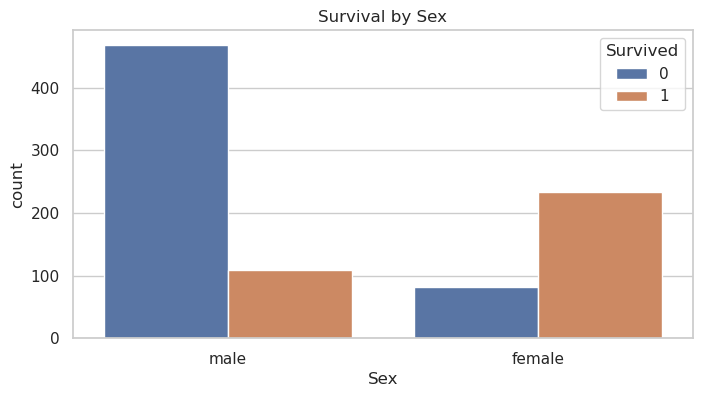

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


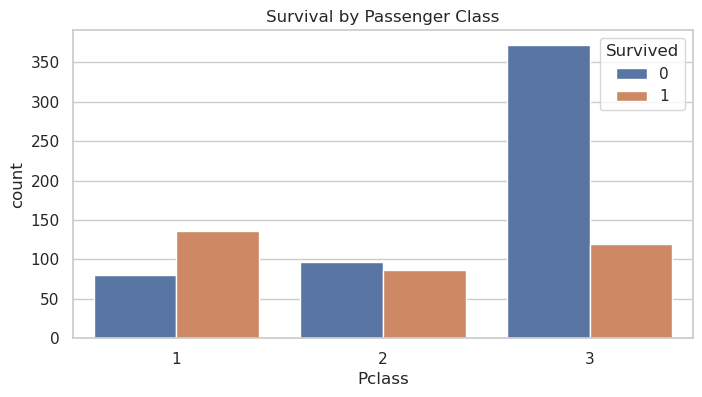

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


df['Survived'] = df['Survived'].astype(str)

plt.figure(figsize=(8,4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Sex')
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()


/tmp/ipykernel_1039/1198649755.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived_num', data=df, estimator=np.mean, ci=None)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


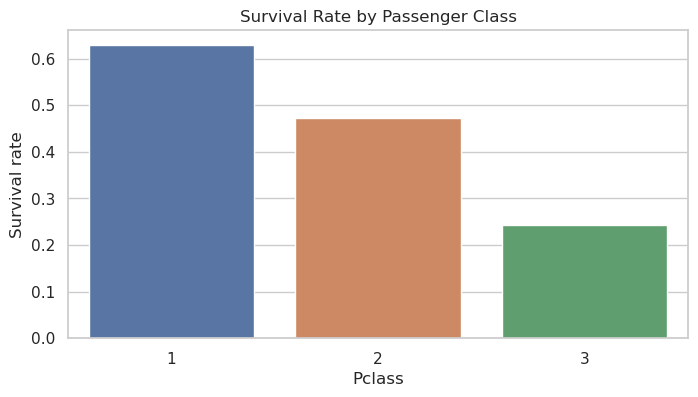

/tmp/ipykernel_1039/1198649755.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived_num', data=df, estimator=np.mean, ci=None)


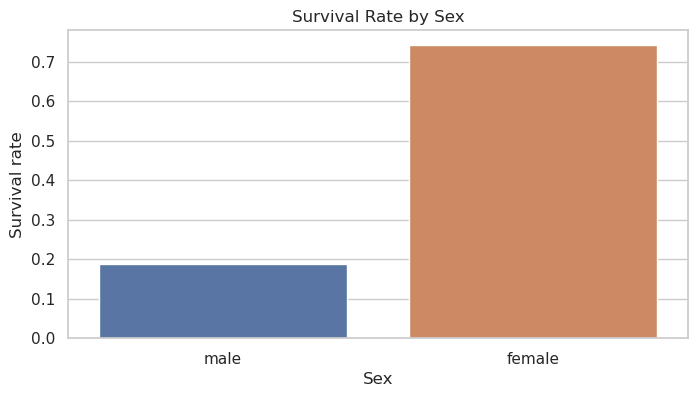

In [19]:

df['Survived_num'] = df['Survived'].astype(int)

plt.figure(figsize=(8,4))
sns.barplot(x='Pclass', y='Survived_num', data=df, estimator=np.mean, ci=None)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival rate')
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(x='Sex', y='Survived_num', data=df, estimator=np.mean, ci=None)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival rate')
plt.show()


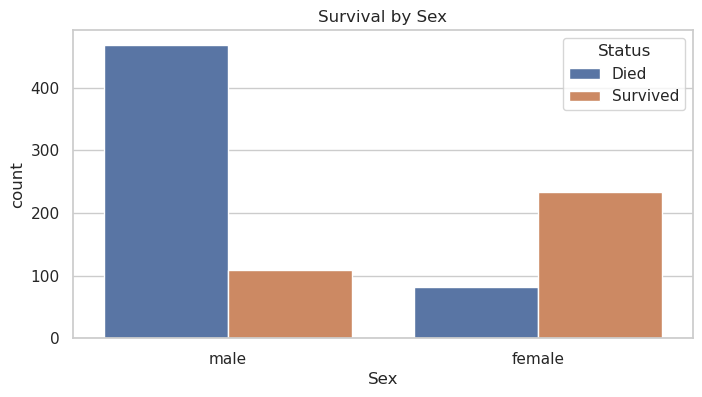

/tmp/ipykernel_1039/169356799.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived_num', data=df, estimator=np.mean, ci=None)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


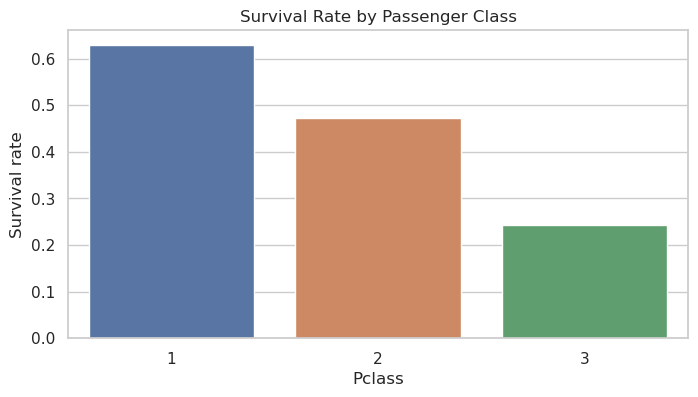

/tmp/ipykernel_1039/169356799.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived_num', data=df, estimator=np.mean, ci=None)


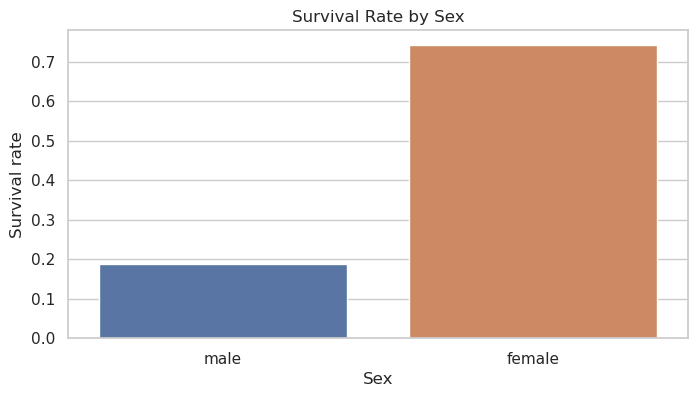

In [21]:

df['Survived_num'] = df['Survived'].astype(int)


df['Survived_label'] = df['Survived_num'].map({0: "Died", 1: "Survived"})

# --- Countplot with nice legend ---
plt.figure(figsize=(8,4))
sns.countplot(x='Sex', hue='Survived_label', data=df)
plt.title('Survival by Sex')
plt.legend(title="Status")
plt.show()

# --- Survival rate by Passenger Class ---
plt.figure(figsize=(8,4))
sns.barplot(x='Pclass', y='Survived_num', data=df, estimator=np.mean, ci=None)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival rate')
plt.show()

# --- Survival rate by Sex ---
plt.figure(figsize=(8,4))
sns.barplot(x='Sex', y='Survived_num', data=df, estimator=np.mean, ci=None)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival rate')
plt.show()


In [23]:

df['Survived'] = pd.to_numeric(df['Survived'], errors='coerce')

print(df['Survived'].unique())
print(df['Survived'].dtype)


[0 1]
int64


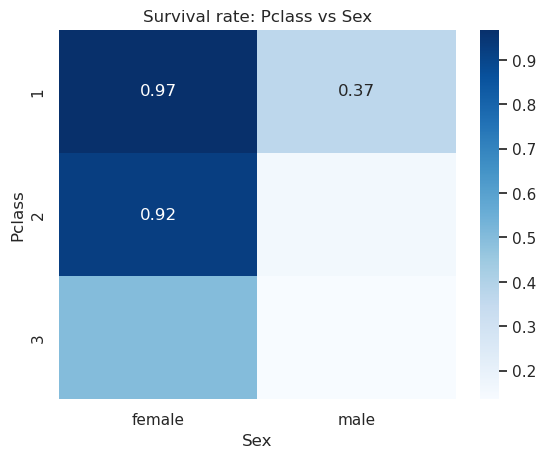

In [24]:
pivot = df.pivot_table(values='Survived', index='Pclass', columns='Sex', aggfunc='mean')

sns.heatmap(pivot, annot=True, fmt='.2f', cmap="Blues")
plt.title('Survival rate: Pclass vs Sex')
plt.show()


In [27]:
# Embarked -> mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Fare -> median 
df['Fare'].fillna(df['Fare'].median(), inplace=True)



In [29]:

df['Age'] = df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))


df['Age'].fillna(df['Age'].median(), inplace=True)


In [31]:
df.isnull().sum()


PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            0
Survived_num        0
Survived_label      0
Title               0
dtype: int64

In [32]:

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)


df['AgeBin'] = pd.cut(df['Age'], bins=[0,12,20,40,60,120], labels=['Child','Teen','Adult','Middle','Senior'])

pd.crosstab(df['AgeBin'], df['Survived'], normalize='index')


Survived,0,1
AgeBin,,
Child,0.424658,0.575342
Teen,0.618182,0.381818
Adult,0.635548,0.364452
Middle,0.612403,0.387597
Senior,0.772727,0.227273


In [34]:

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1


/tmp/ipykernel_1039/110853439.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='IsAlone', y='Survived', data=df, estimator=np.mean, ci=None)


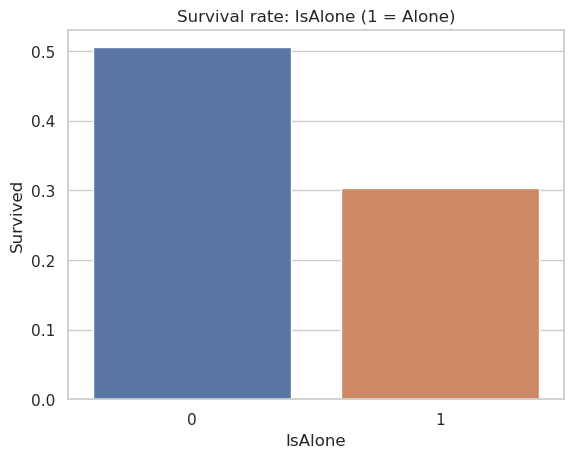

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.barplot(x='IsAlone', y='Survived', data=df, estimator=np.mean, ci=None)
plt.title('Survival rate: IsAlone (1 = Alone)')
plt.show()


Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


/tmp/ipykernel_1039/3686383830.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Pclass','Sex'])['Survived'].mean().unstack()


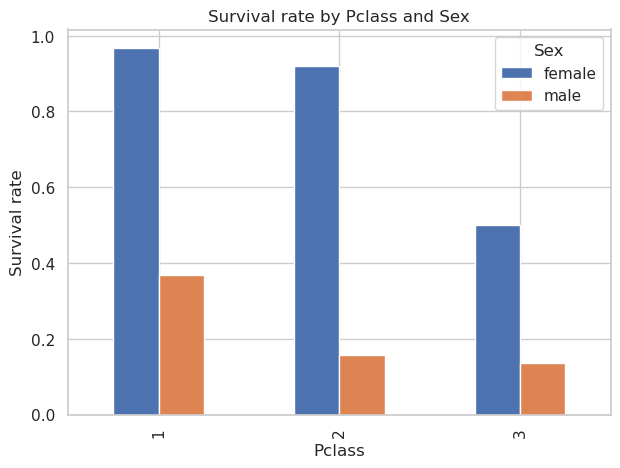

In [36]:

grouped = df.groupby(['Pclass','Sex'])['Survived'].mean().unstack()
print(grouped)


grouped.plot(kind='bar', figsize=(7,5))
plt.ylabel('Survival rate')
plt.title('Survival rate by Pclass and Sex')
plt.show()


In [37]:
df.to_csv('train_cleaned.csv', index=False)